# HW 4

## Question 1. Data Preparation and Overview

### 1) Load the overall graph and individual book graphs.

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df_all = pd.read_csv("harry-potter-interactions/data/hp_all_edges.csv")

df_books = []

for ii in range(1, 8):
    book_path = f"harry-potter-interactions/data/hp_book{ii}_edges.csv"
    df_books.append(pd.read_csv(book_path))

G_all = nx.DiGraph()

G_books = []

for ii in range(len(df_all)):
    G_all.add_edge(df_all["source"][ii], 
                   df_all["target"][ii], 
                   weight= df_all["weight"][ii])

for ii in range(len(df_books)):
    G_book = nx.DiGraph()
    for jj in range(len(df_books[ii])):
        G_book.add_edge(df_books[ii]["source"][jj], 
                        df_books[ii]["target"][jj], 
                        weight= df_books[ii]["weight"][jj])
        
    G_books.append(G_book)


Graphs are loaded in two variables:

`G_all` is the graph for all of the books.

`G_books` is a list where each element index corresponds to the book of the same number minus 1. So the first book's graph is `G_books[0]`.

### 2) Provide a statistical summary for each graph (number of nodes, edges, average degree, etc.)

In [5]:
print("G_all:\tGraph of All Books")
print("Number of Nodes:\t", len(list(G_all.nodes)))
print("Number of Edges:\t", len(list(G_all.edges)))

avg_deg = np.mean([deg for _, deg in nx.degree(G_all)])
print("Average Degree: \t", f"{avg_deg:.2f}")

avg_clustering_coefficient = np.mean([val for _, val in nx.clustering(G_all).items()])
print("Average Clustering Coefficient:\t", f"{avg_clustering_coefficient:.2f}\n")

for ii in range(len(G_books)):
    print(f"G_books[{ii}]:\tGraph of Book Number {ii+1}")
    print("Number of Nodes:\t", len(list(G_books[ii].nodes)))
    print("Number of Edges:\t", len(list(G_books[ii].edges)))

    avg_deg = np.mean([deg for _, deg in nx.degree(G_books[ii])])
    print("Average Degree: \t", f"{avg_deg:.2f}")

    avg_clustering_coefficient = np.mean([val for _, val in nx.clustering(G_books[ii]).items()])
    print("Average Clustering Coefficient:\t", f"{avg_clustering_coefficient:.2f}\n")


G_all:	Graph of All Books
Number of Nodes:	 478
Number of Edges:	 4213
Average Degree: 	 17.63
Average Clustering Coefficient:	 0.32

G_books[0]:	Graph of Book Number 1
Number of Nodes:	 122
Number of Edges:	 475
Average Degree: 	 7.79
Average Clustering Coefficient:	 0.30

G_books[1]:	Graph of Book Number 2
Number of Nodes:	 96
Number of Edges:	 534
Average Degree: 	 11.12
Average Clustering Coefficient:	 0.31

G_books[2]:	Graph of Book Number 3
Number of Nodes:	 90
Number of Edges:	 645
Average Degree: 	 14.33
Average Clustering Coefficient:	 0.34

G_books[3]:	Graph of Book Number 4
Number of Nodes:	 178
Number of Edges:	 1156
Average Degree: 	 12.99
Average Clustering Coefficient:	 0.31

G_books[4]:	Graph of Book Number 5
Number of Nodes:	 223
Number of Edges:	 1605
Average Degree: 	 14.39
Average Clustering Coefficient:	 0.31

G_books[5]:	Graph of Book Number 6
Number of Nodes:	 198
Number of Edges:	 1195
Average Degree: 	 12.07
Average Clustering Coefficient:	 0.34

G_books[6]:	Gr

## Question 2. Centrality Analysis

### 1) For the interaction network of each book, compute the following centrality metrics for all characters:
- Degree Centrality
- Weighted Degree Centrality
- Betweenness Centrality
- Closeness Centrality
- Eigenvector Centrality
- PageRank

In [6]:
centralities = {
    "deg_cens": [],
    "weighted_deg_cens": [],
    "bet_cens": [],
    "close_cens": [],
    "eig_cens": [],
    "pageranks": [],
}

for ii in range(len(G_books)):
    deg = G_books[ii].degree()
    weighted_deg = {}
    for name in G_books[ii].nodes():
        deg_in = G_books[ii].in_degree(name, weight= 'weight')
        deg_out = G_books[ii].out_degree(name, weight= 'weight')
        weighted_deg[name] = int(deg_in+deg_out)

    bet = nx.betweenness_centrality(G_books[ii])    # Weighted?
    close = nx.closeness_centrality(G_books[ii])
    eig_cen = nx.eigenvector_centrality(G_books[ii], max_iter= 1000)
    pr = nx.pagerank(G_books[ii])

    centralities["deg_cens"].append(dict(deg))
    centralities["weighted_deg_cens"].append(weighted_deg)
    centralities["bet_cens"].append(bet)
    centralities["close_cens"].append(close)
    centralities["eig_cens"].append(eig_cen)
    centralities["pageranks"].append(pr)

 ### 2) Identify the top 10 characters based on each centrality measure for every book. Visualize and discuss the evolution of these characters’ centrality across the series, emphasizing how their roles and narrative significance develop within each book.

deg_cens
Book 1


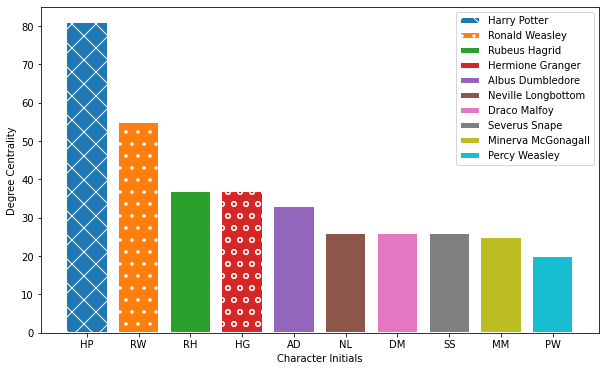

Book 2


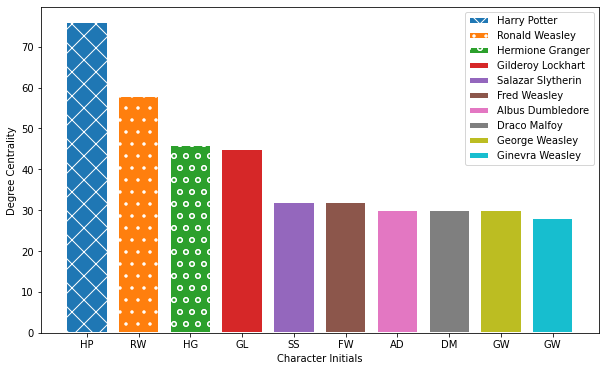

Book 3


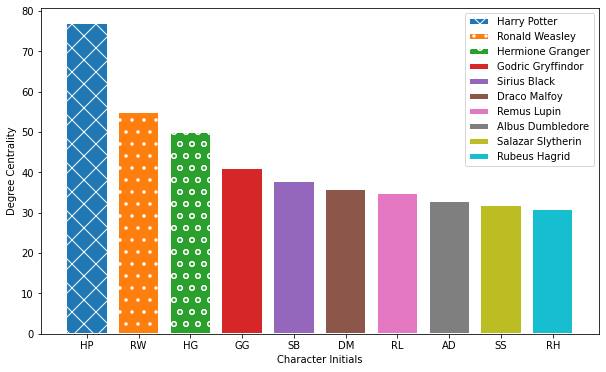

Book 4


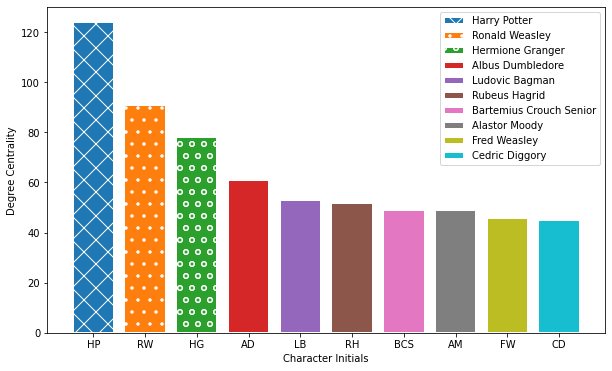

Book 5


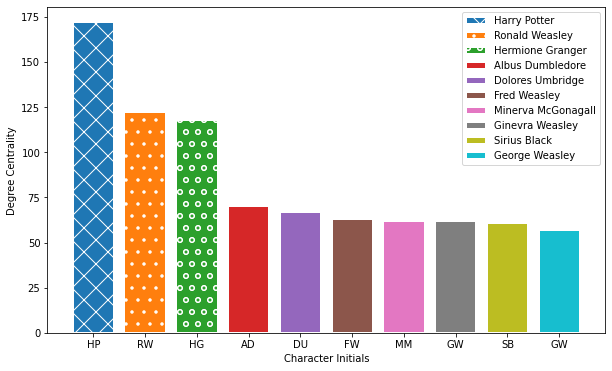

Book 6


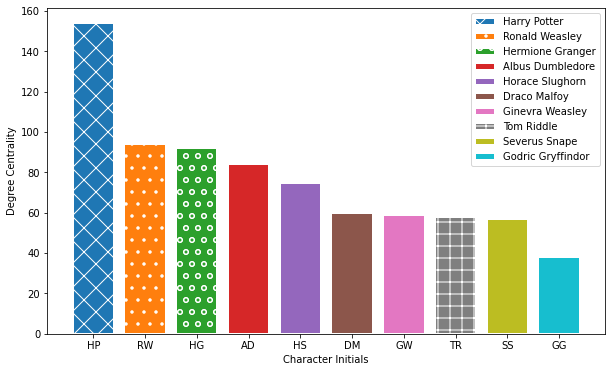

Book 7


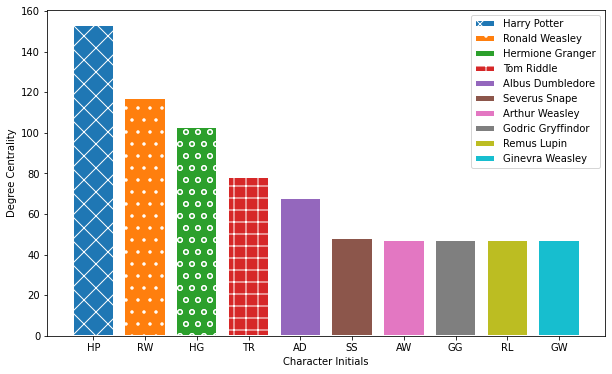

weighted_deg_cens
Book 1


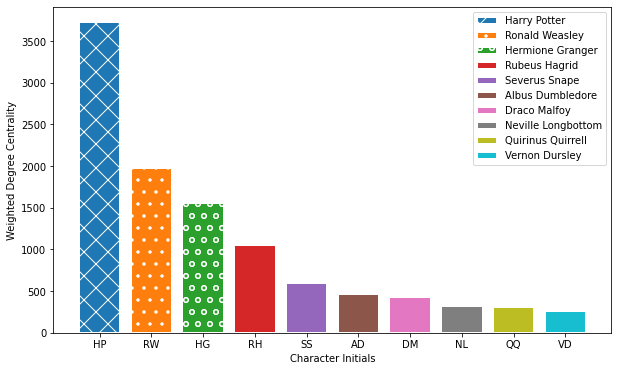

Book 2


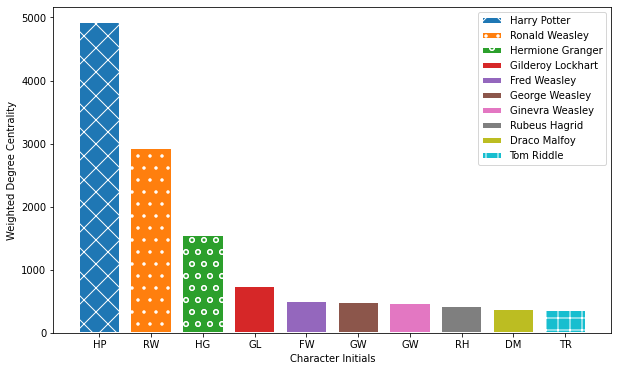

Book 3


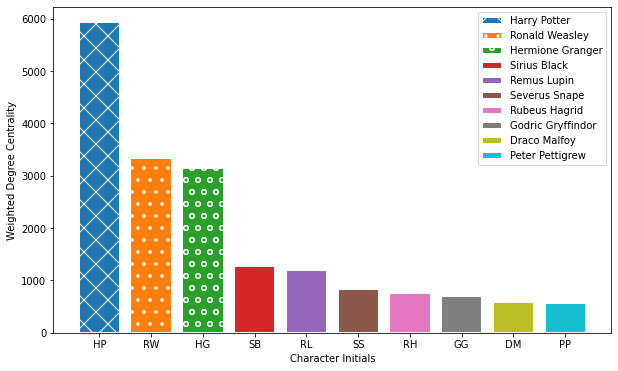

Book 4


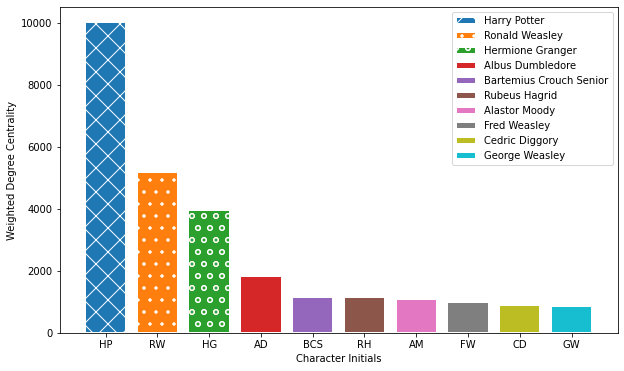

Book 5


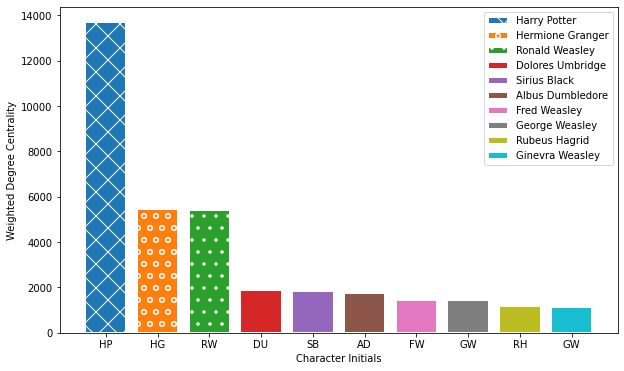

Book 6


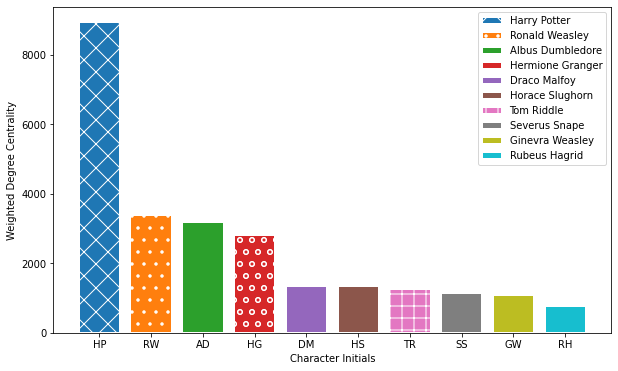

Book 7


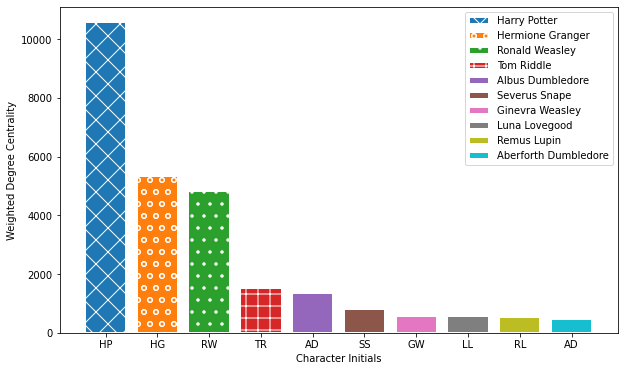

bet_cens
Book 1


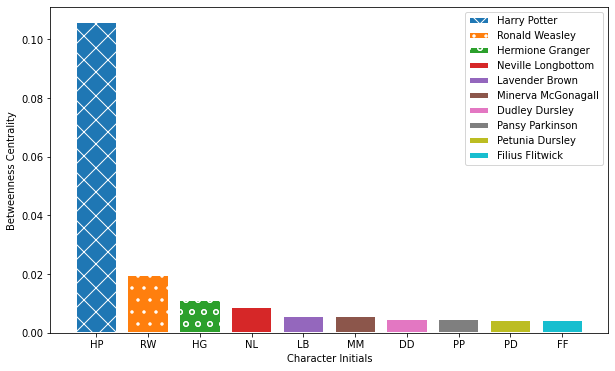

Book 2


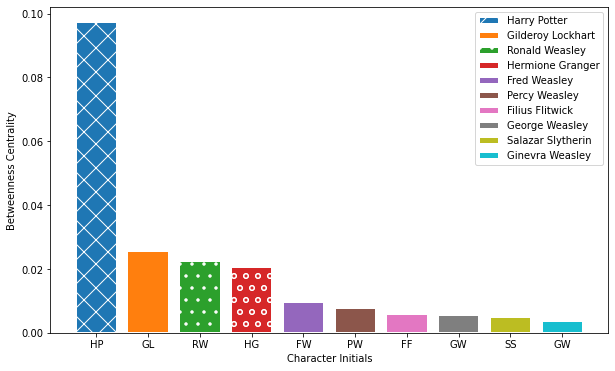

Book 3


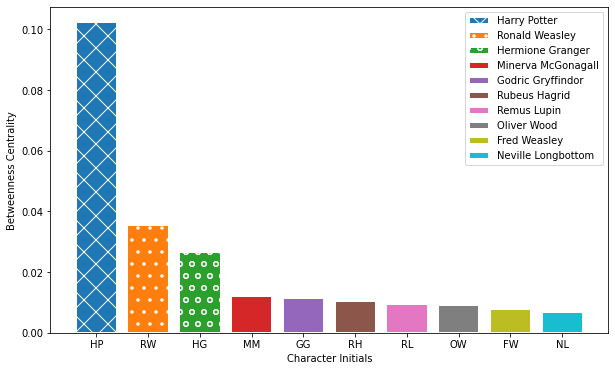

Book 4


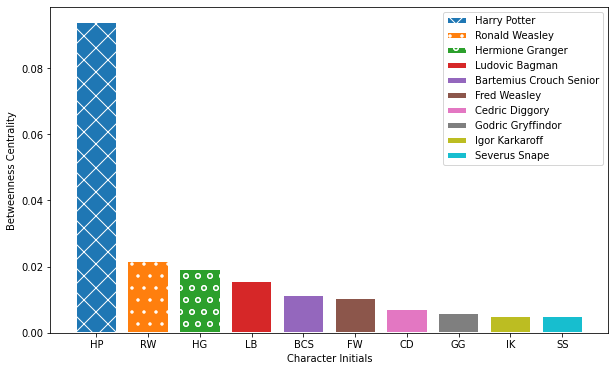

Book 5


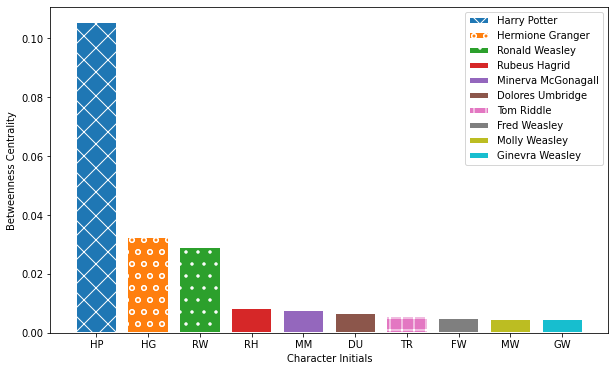

Book 6


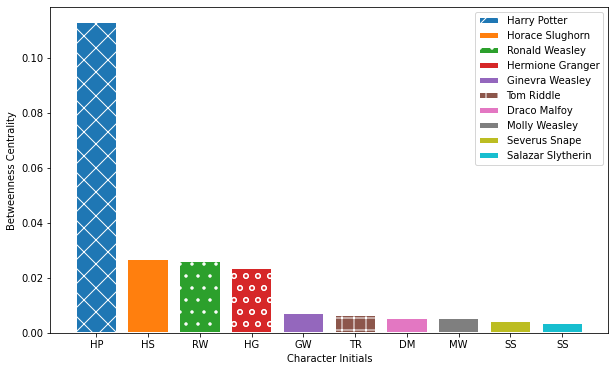

Book 7


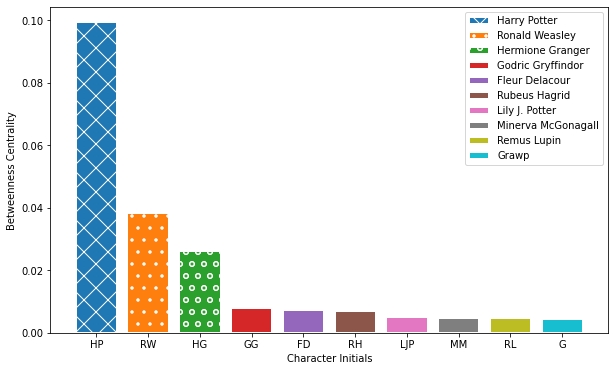

close_cens
Book 1


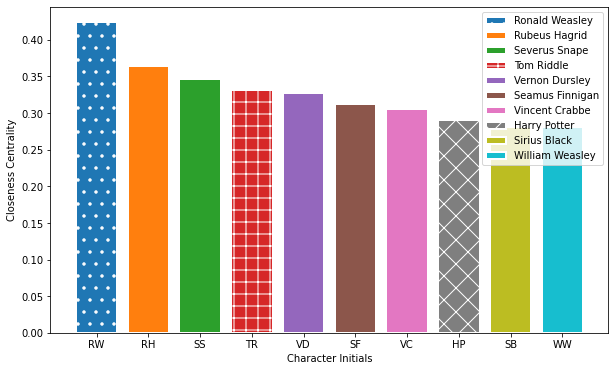

Book 2


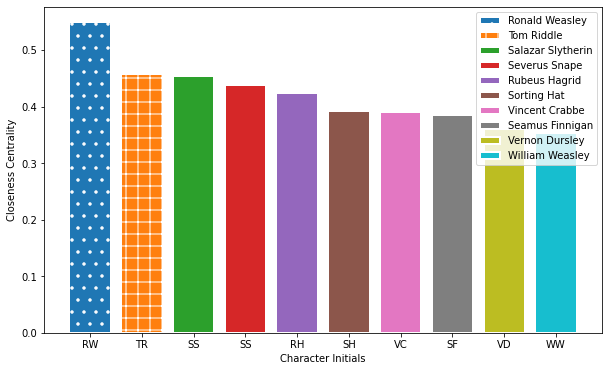

Book 3


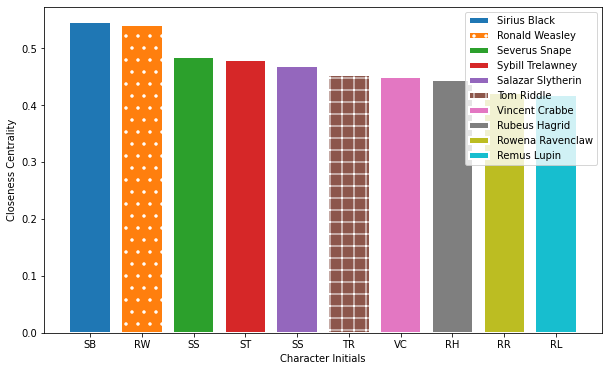

Book 4


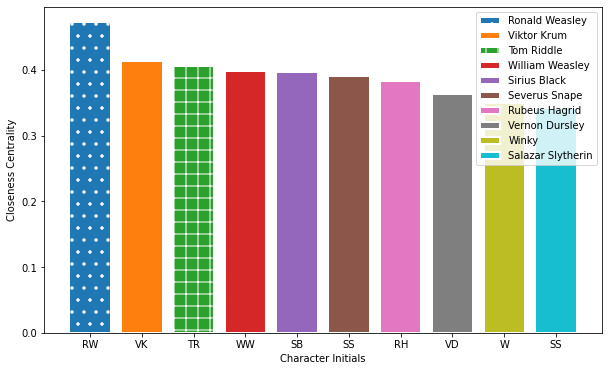

Book 5


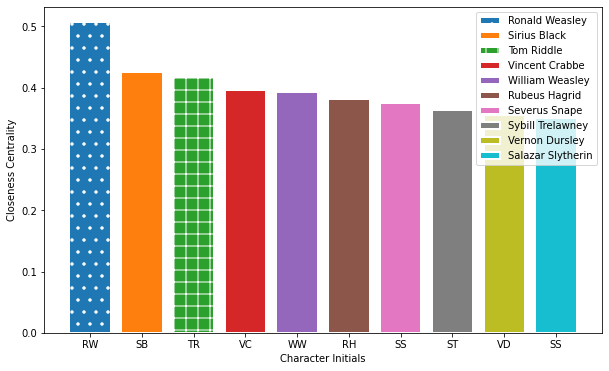

Book 6


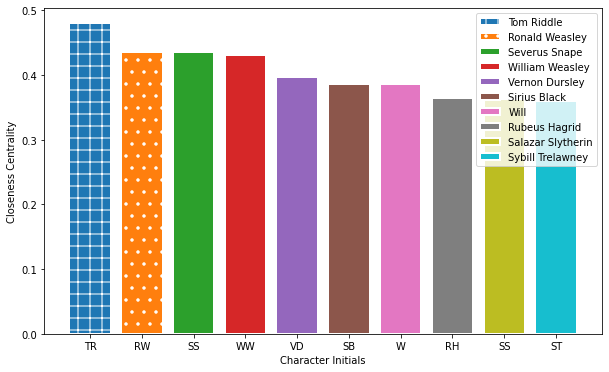

Book 7


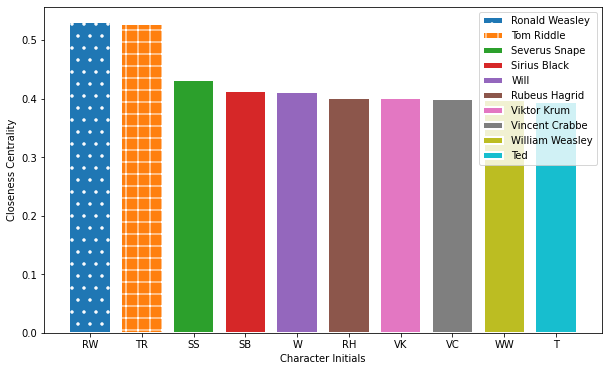

eig_cens
Book 1


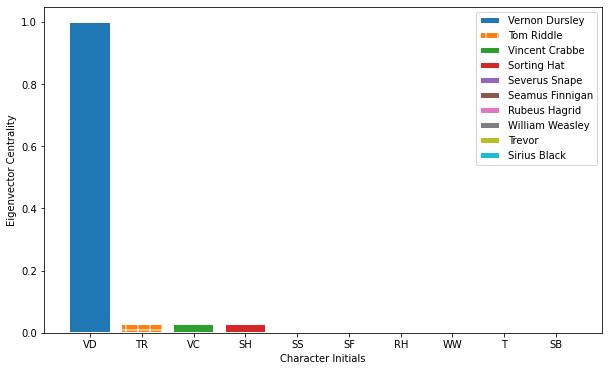

Book 2


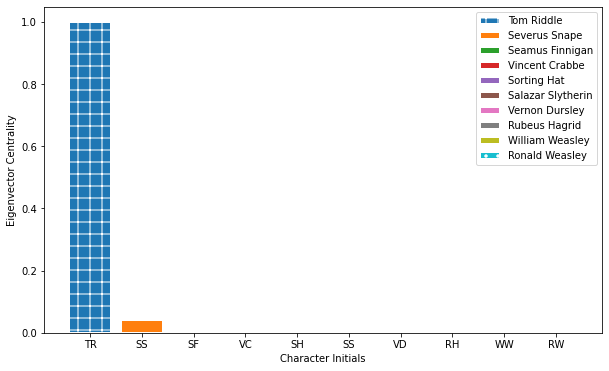

Book 3


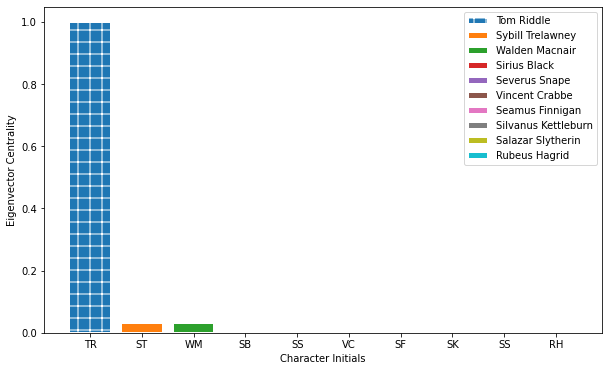

Book 4


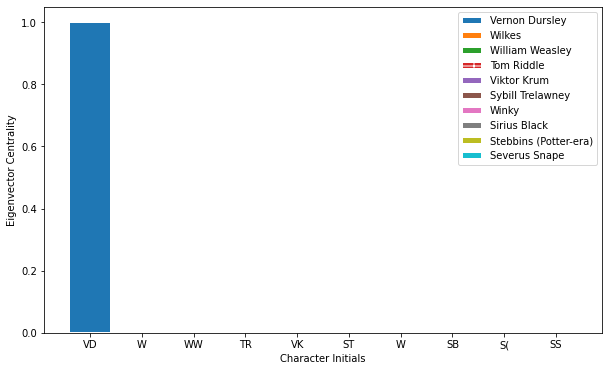

Book 5


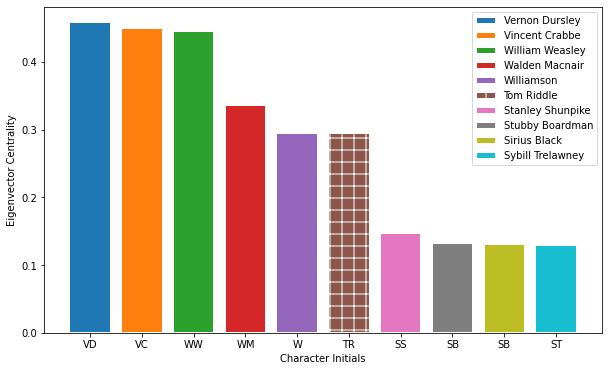

Book 6


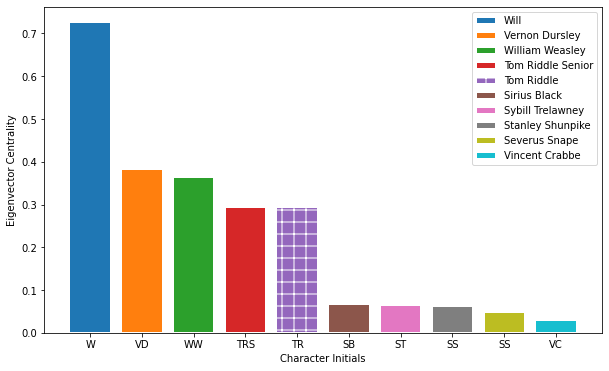

Book 7


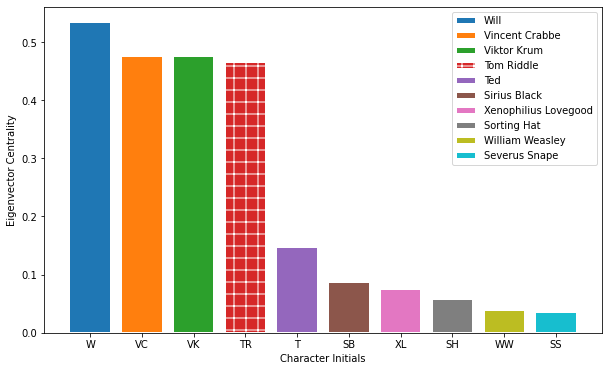

pageranks
Book 1


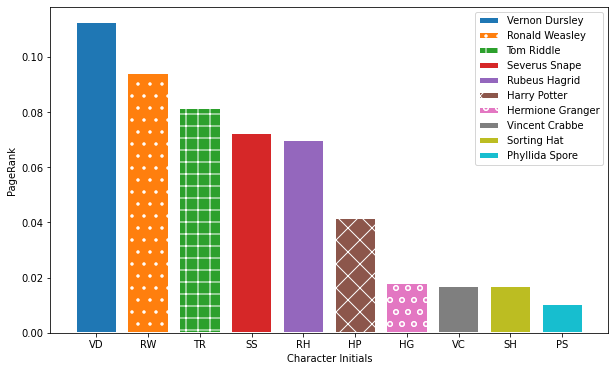

Book 2


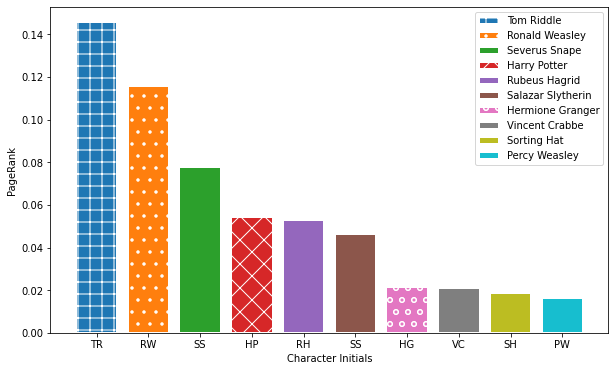

Book 3


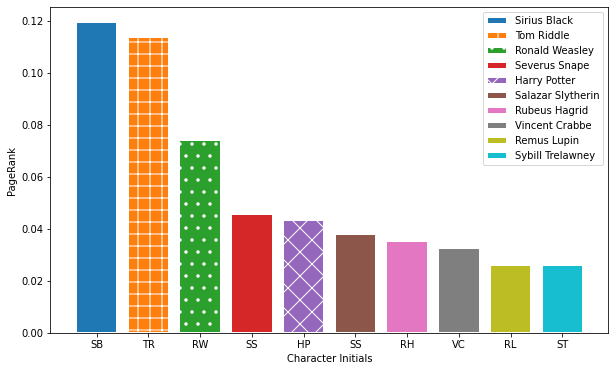

Book 4


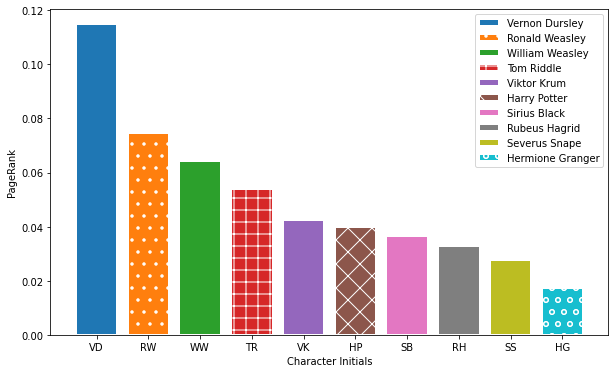

Book 5


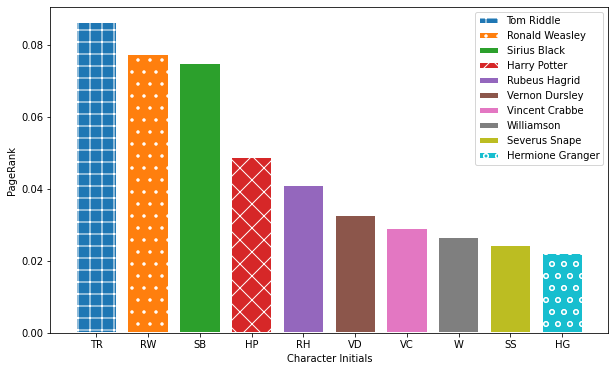

Book 6


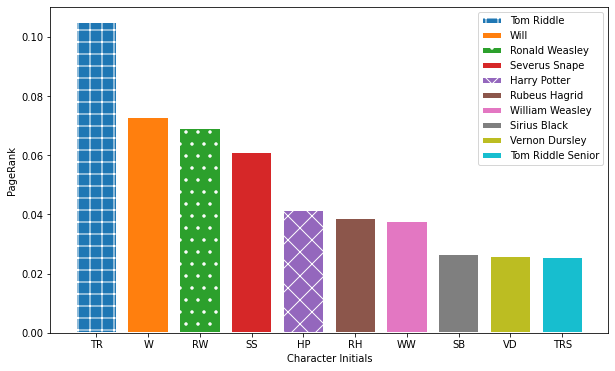

Book 7


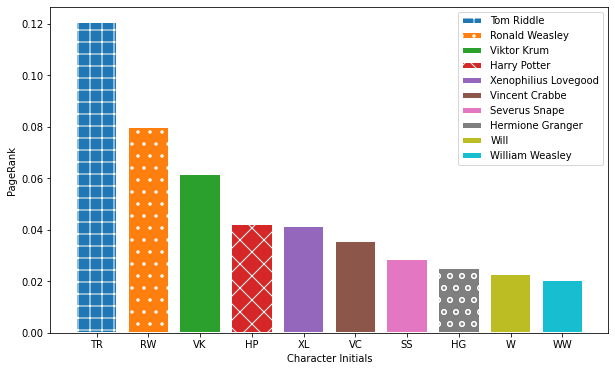

63


In [7]:
cen_names = {
    "deg_cens": "Degree Centrality",
    "weighted_deg_cens": "Weighted Degree Centrality",
    "bet_cens": "Betweenness Centrality",
    "close_cens": "Closeness Centrality",
    "eig_cens": "Eigenvector Centrality",
    "pageranks": "PageRank",
}

total_chars = []

for cent in centralities:
    print(cent)
    df_series = pd.DataFrame()
    
    for ii in range(len(centralities[cent])):
        name_book = f"name_book_{ii+1}"
        cen_book = f"centrality_book_{ii+1}"

        all_names = list(centralities[cent][ii].keys())
        all_cents = list(centralities[cent][ii].values())

        sort_order = sorted(range(len(all_cents)), key= lambda kk: all_cents[kk])[::-1]
        all_names = [all_names[jj] for jj in sort_order]
        all_cents = [all_cents[jj] for jj in sort_order]

        df_series[name_book] = pd.Series(all_names[:10], name= name_book)
        df_series[cen_book] = pd.Series(all_cents[:10], name= cen_book)

    # At this point we have a DataFrame with 14 (2*7) columns
    
    bar_width = 0.8
    book_nums = 7
    chars = 10

    tab_cmap = plt.get_cmap("tab10")

    clrs = [tab_cmap(kk) for kk in range(chars)]

    new_chars = np.unique([df_series[f"name_book_{ii+1}"] for ii in range(book_nums)])
    for chr in new_chars:
        if not chr in total_chars:
            total_chars.append(chr)

    for ii in range(book_nums):
        plt.figure(figsize= (10, 6))
        book_num = ii+1

        print(f"Book {book_num}")

        hatches = ["" for _ in range(chars)]

        char_names = df_series[f"name_book_{book_num}"]

        if len(char_names[char_names == "Harry Potter"]):
            hatches[char_names[char_names == "Harry Potter"].index[0]] = "X"
        if len(char_names[char_names == "Ronald Weasley"]):
            hatches[char_names[char_names == "Ronald Weasley"].index[0]] = "."
        if len(char_names[char_names == "Hermione Granger"]):
            hatches[char_names[char_names == "Hermione Granger"].index[0]] = "o"

        if len(char_names[char_names == "Tom Riddle"]):
            hatches[char_names[char_names == "Tom Riddle"].index[0]] = "+"

        bar_pos = np.arange(chars)
        plt.bar(bar_pos, 
                df_series[f"centrality_book_{book_num}"],
                width= bar_width,
                color= clrs,
                edgecolor= "white",
                linewidth= 2,
                hatch= hatches,
                label= df_series[f"name_book_{book_num}"])
        
        x_ticks = bar_pos
        tick_labels = []

        for name in df_series[f"name_book_{book_num}"]:
            ns = name.split()
            initials = "".join([n[0] for n in ns])
            tick_labels.append(initials)

        fp = f"images/{cen_names[cent].lower()}_book_{book_num}.png".replace(" ", "_")

        plt.xticks(x_ticks, tick_labels)
        plt.ylabel(cen_names[cent])
        plt.xlabel("Character Initials")
        plt.legend()
        plt.savefig(fp, dpi= 200)
        plt.show()

print(len(total_chars))

## Question 3. Community Detection

### 1) Apply community detection algorithms (e.g., Spectral Clustering, Louvain Method, Girvan–Newman Algorithm) to the overall interaction graph. Visualize the resulting community structures, ensuring node size is scaled by each character’s PageRank and their label size is scaled by their Betweenness Centrality. This visualization will help highlight both the prominence and the brokerage roles of characters within their communities.

In [ ]:
# Alternatively use a different method:

lv_comms = nx.community.louvain_communities(G_all, seed= 2025)

group_counts = {ii: len(s) for ii, s in enumerate(lv_comms)}

group_colors = {ii: tab_cmap(ii) for ii in range(len(lv_comms))}
for k in group_colors:
    if group_counts[k] < 10:
        group_colors[k] = "gray"

node_colors = []
for node in G_all.nodes():
    for ii, comm in enumerate(lv_comms):
        if node in comm:
            node_colors.append(group_colors[ii])


In [97]:
pagerank_all = nx.pagerank(G_all, max_iter= 200, weight="weight")
pagerank_arr = np.array([pagerank_all[node] for node in pagerank_all])

betcen_all = nx.betweenness_centrality(G_all)
betcen_arr = np.array([betcen_all[node] for node in betcen_all])

node_size_min = 50
node_size_max = 800
node_scale = node_size_min+(pagerank_arr-np.min(pagerank_arr))/(np.max(pagerank_arr)-np.min(pagerank_arr))*(node_size_max-node_size_min)

label_size_min = 8
label_size_max = 16
label_scale = label_size_min+(betcen_arr-np.min(betcen_arr))/(np.max(betcen_arr)-np.min(betcen_arr))*(label_size_max-label_size_min)

16
1/16


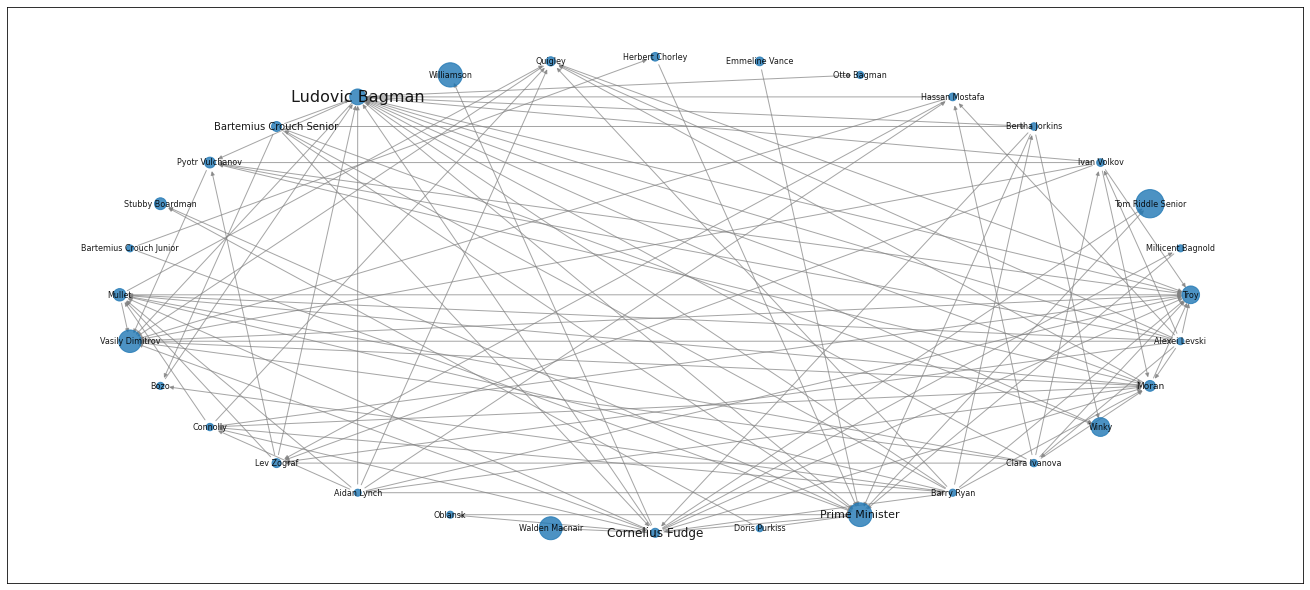

2/16


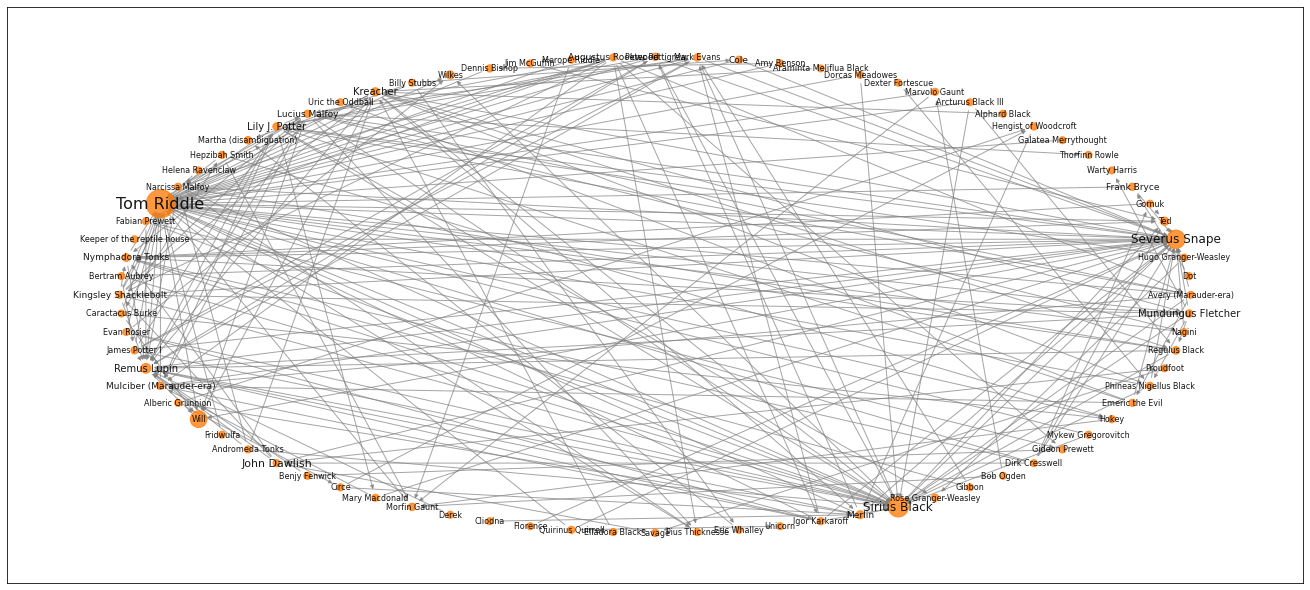

3/16


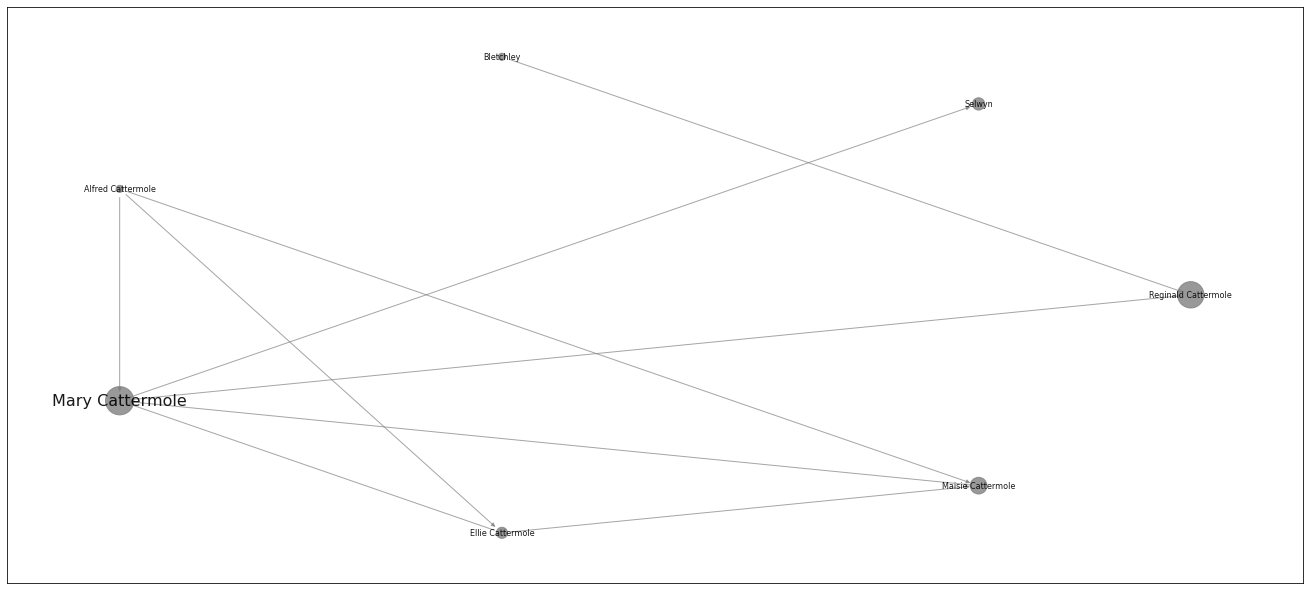

4/16


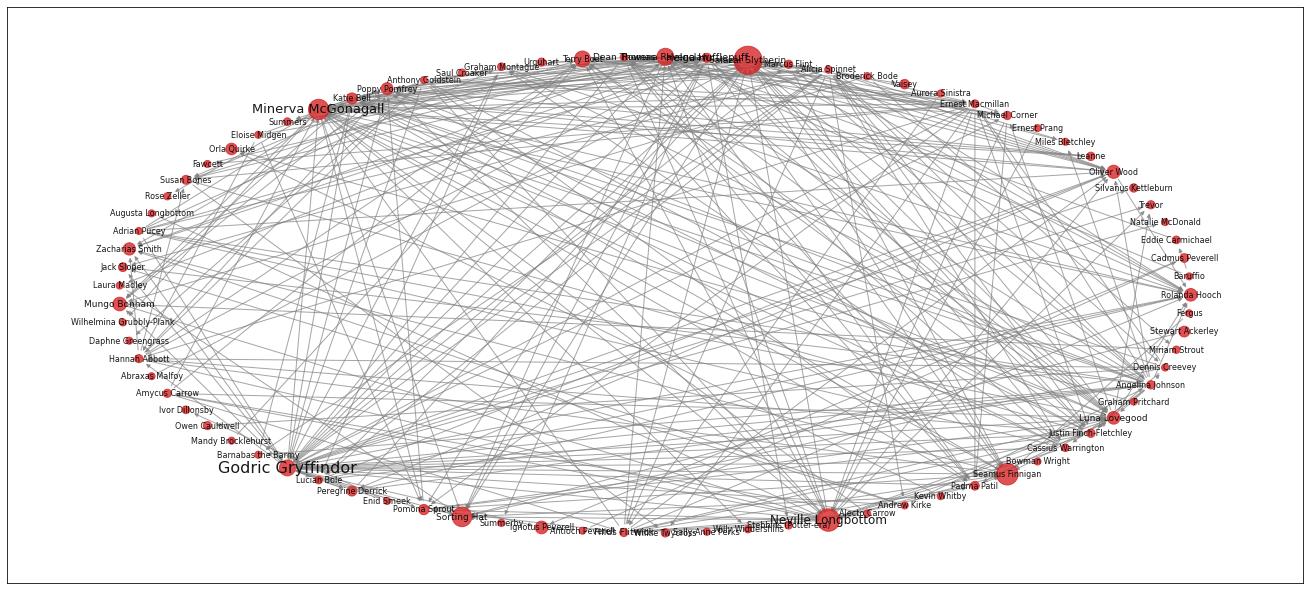

5/16


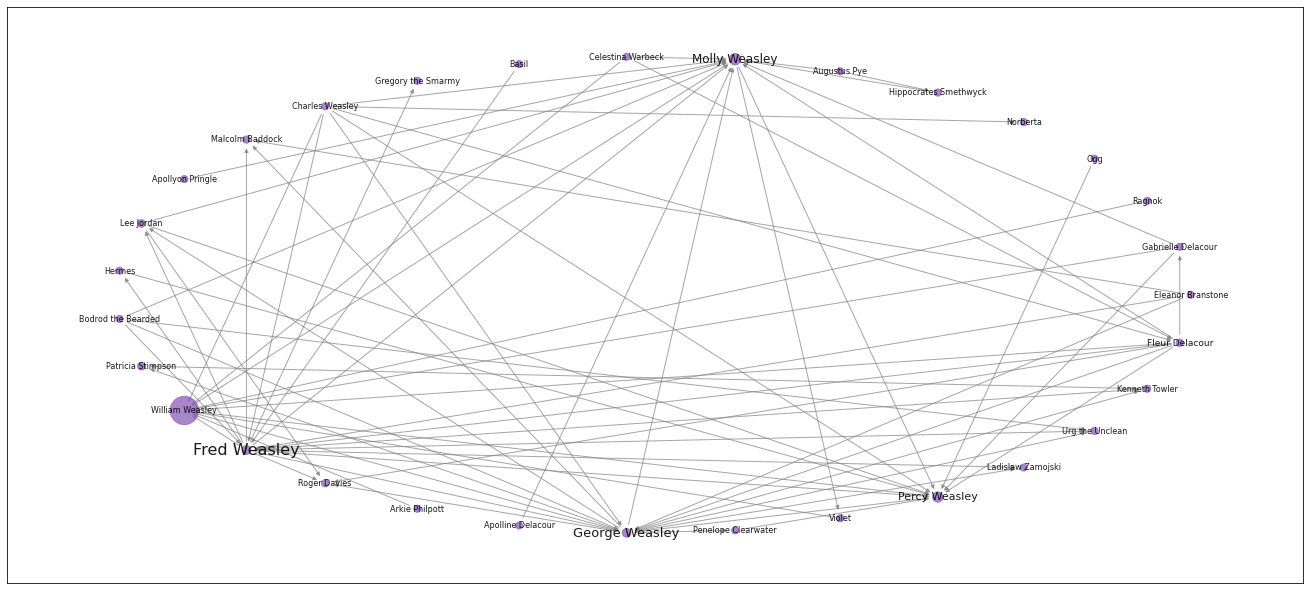

6/16


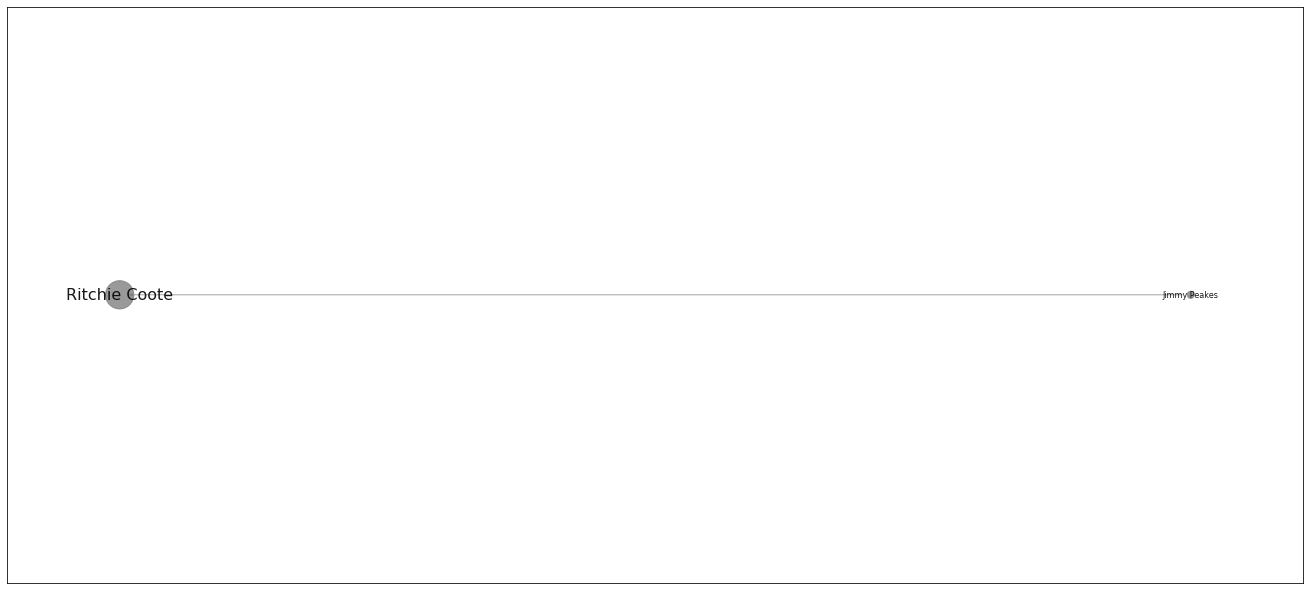

7/16


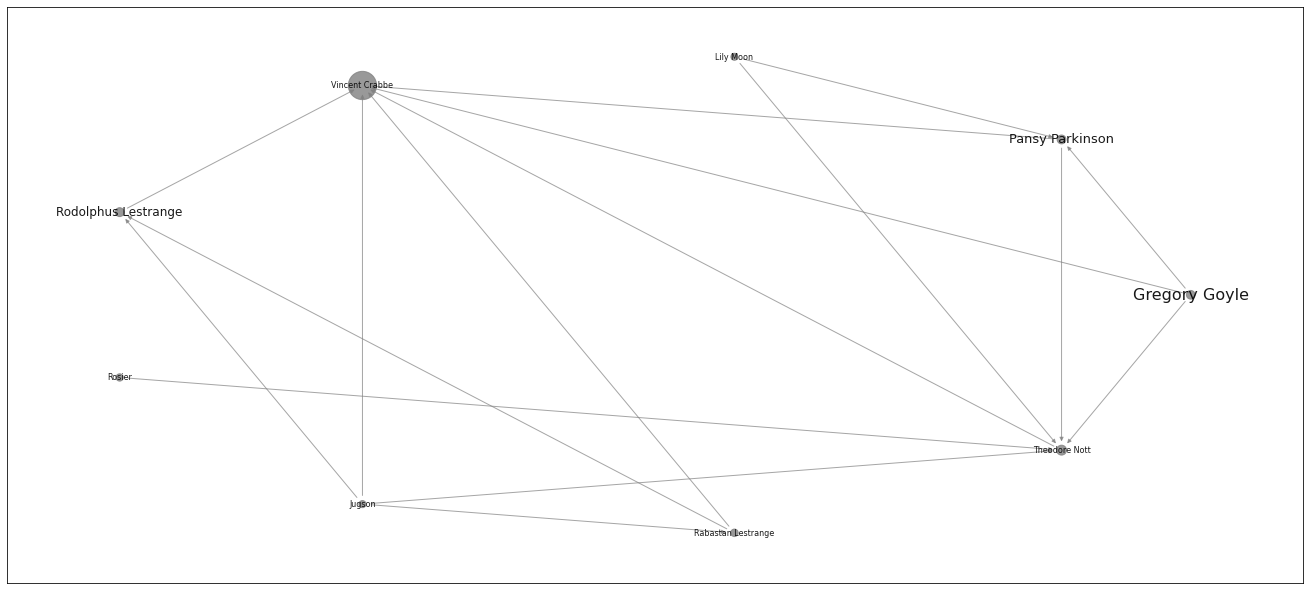

8/16


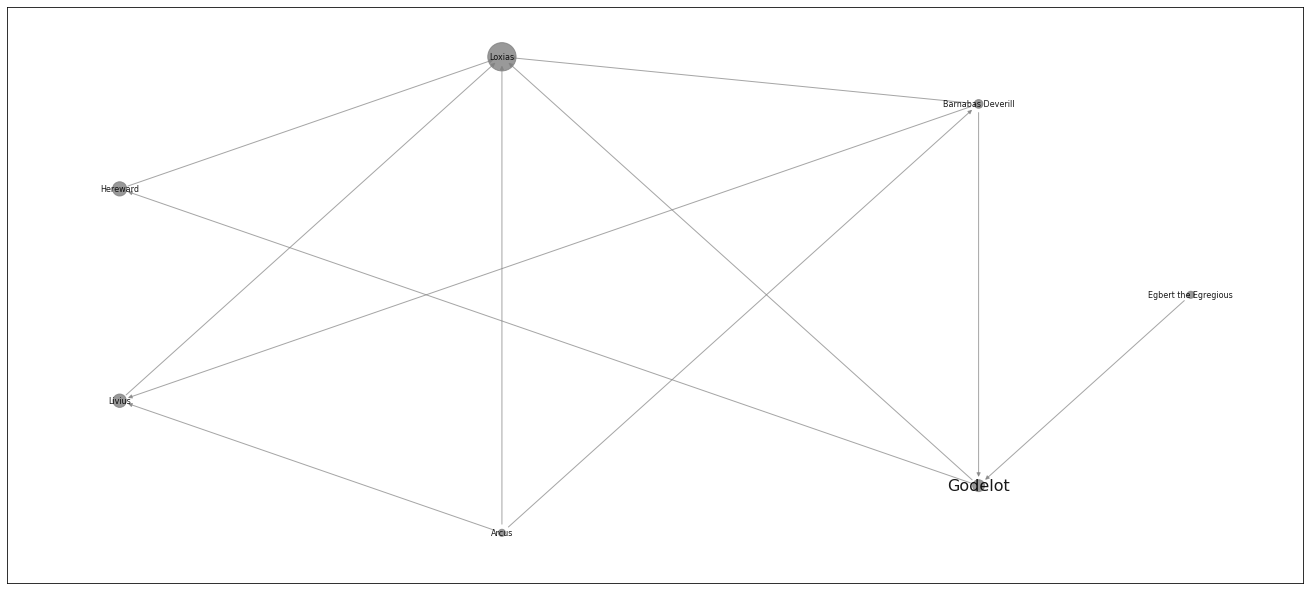

9/16


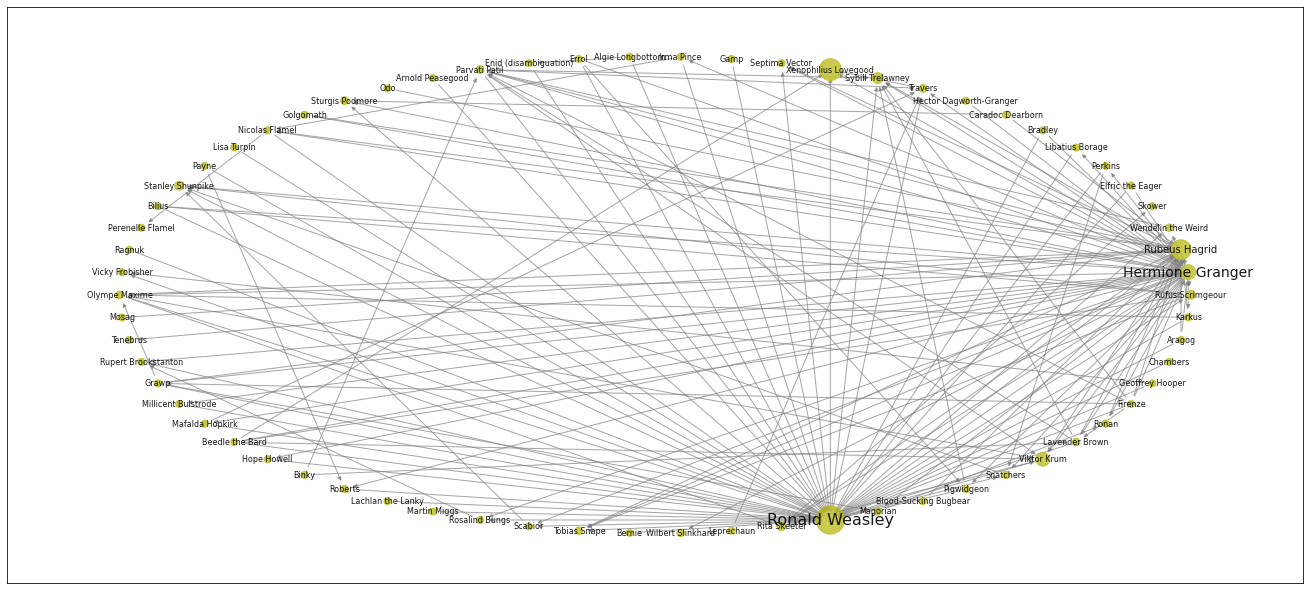

10/16


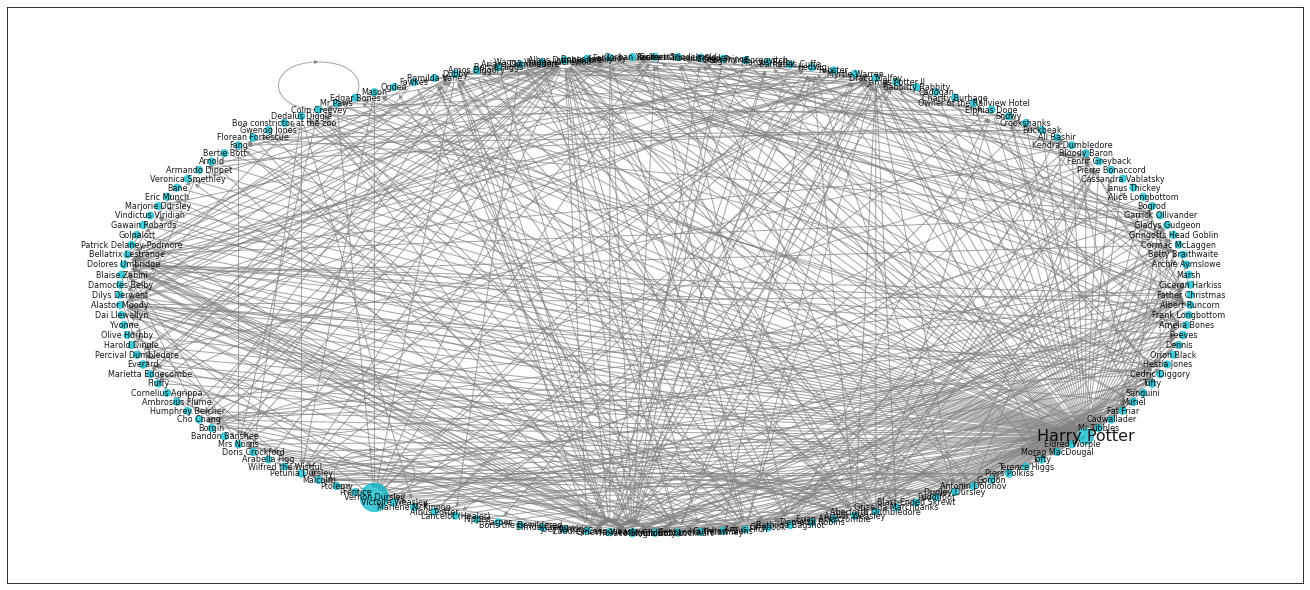

11/16


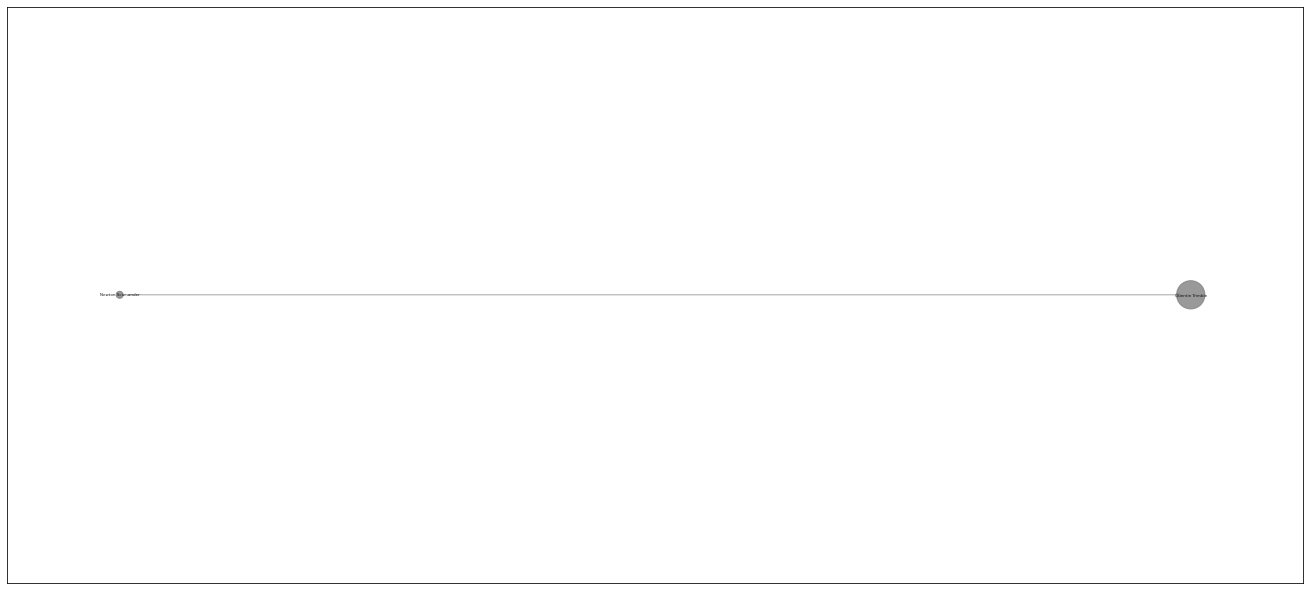

12/16


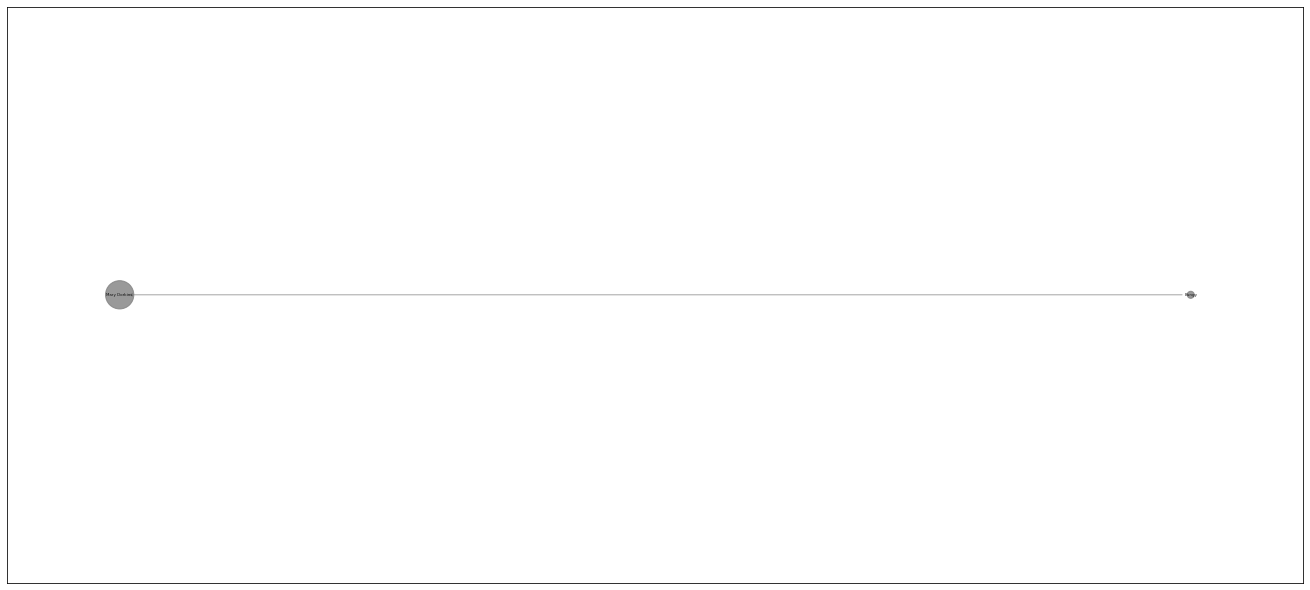

13/16


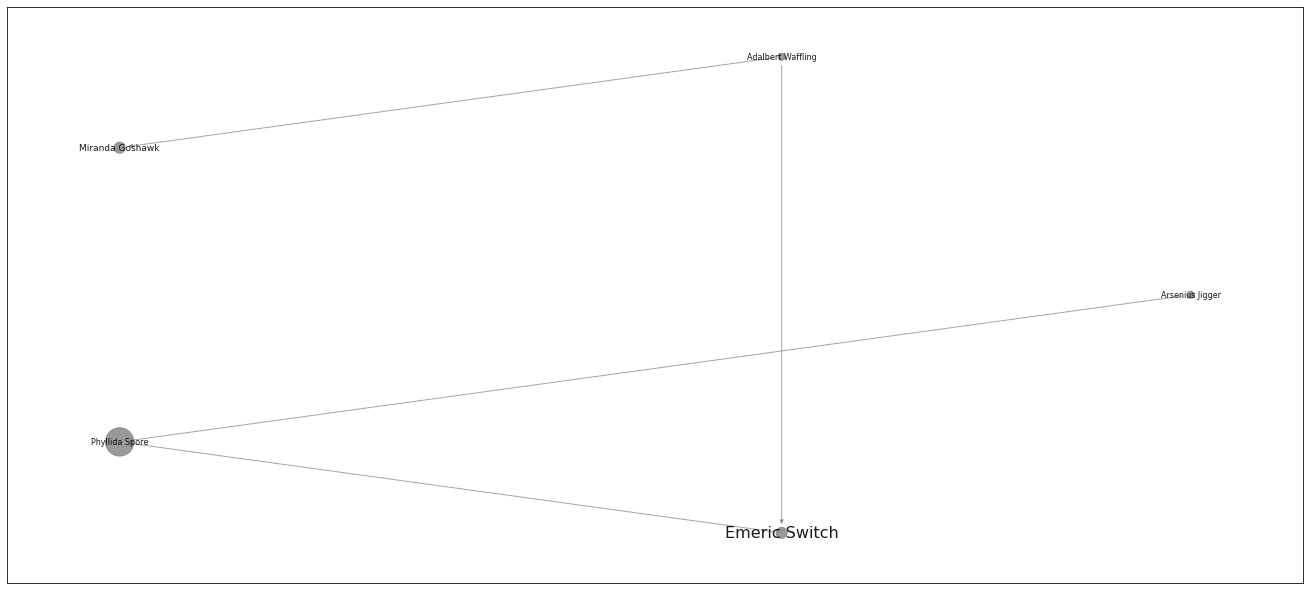

14/16


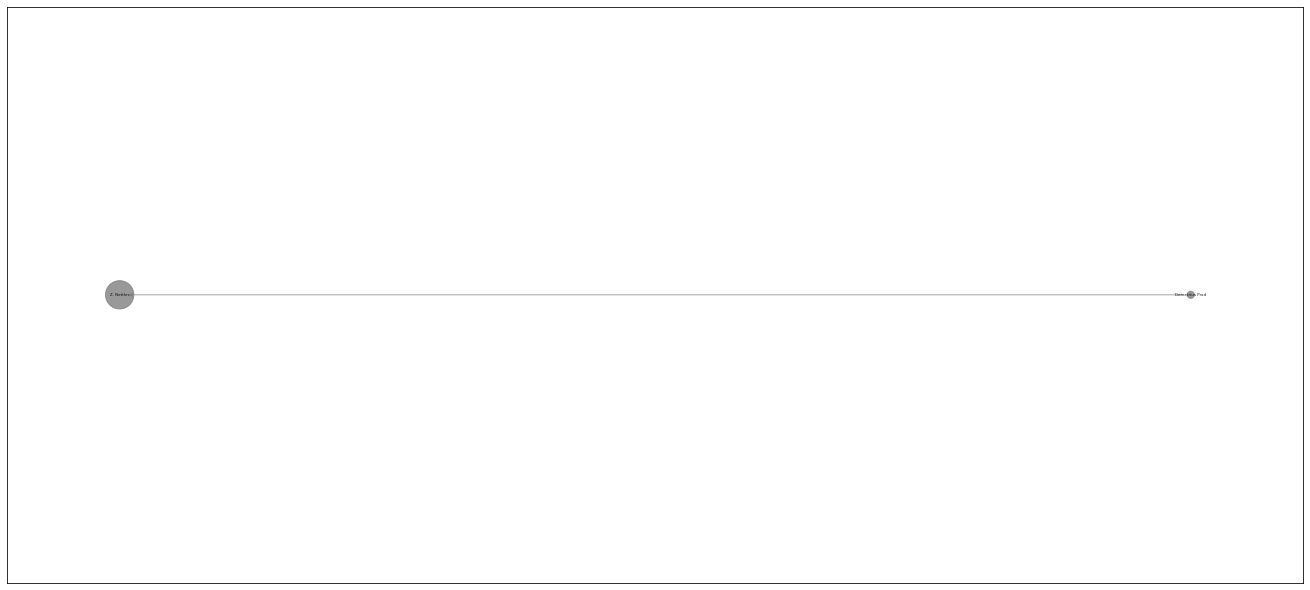

15/16


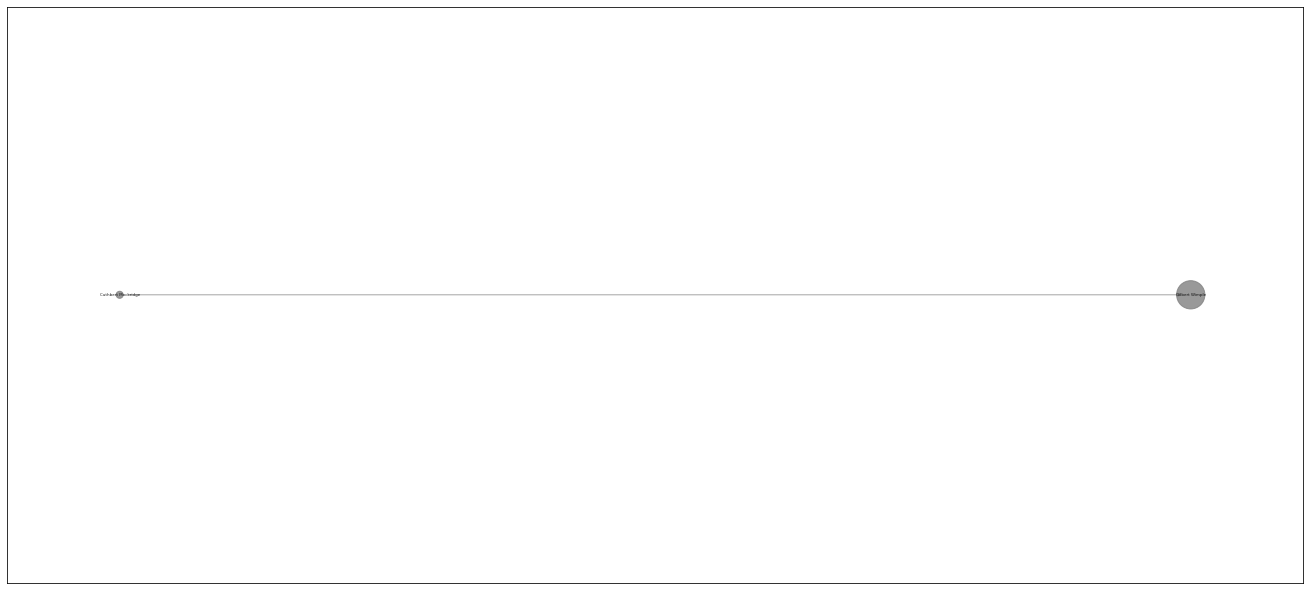

16/16


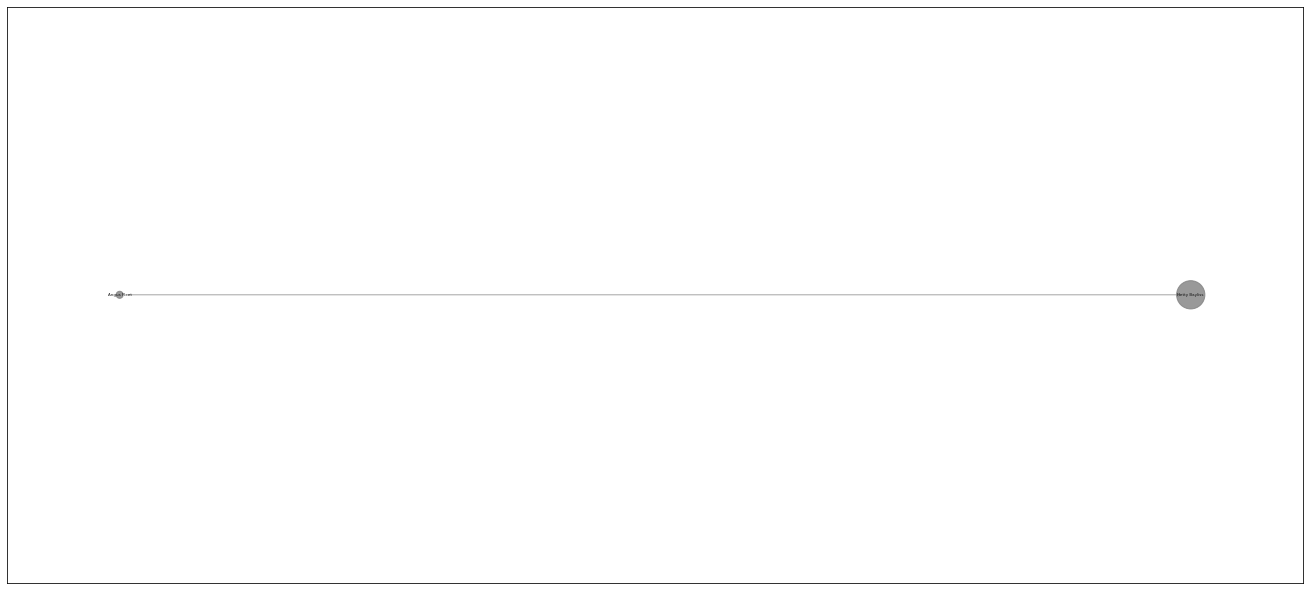

In [125]:
g_pos = nx.spring_layout(G_all, k= 0.15, seed= 2025)
print(len(lv_comms))
for ii, comm in enumerate(lv_comms):
    print(f"{ii+1}/{len(lv_comms)}")
    plt.figure(figsize=(12, 8))
    g_pos_comm = nx.circular_layout(G_all.subgraph(list(comm)), scale= 0.1)


    pr_comm = np.array([pagerank_all[node] for node in comm])
    comm_node_size = node_size_min+(pr_comm-np.min(pr_comm))/(np.max(pr_comm)-np.min(pr_comm))*(node_size_max-node_size_min)

    bc_comm = np.array([betcen_all[node] for node in comm])
    if (np.max(bc_comm)-np.min(bc_comm)) != 0:
        comm_label_size = label_size_min+(bc_comm-np.min(bc_comm))/(np.max(bc_comm)-np.min(bc_comm))*(label_size_max-label_size_min)
    else: 
        comm_label_size = (label_size_max-label_size_min)/2*np.ones(shape= bc_comm.shape)
    nx.draw_networkx_nodes(G_all.subgraph(list(comm)), 
                           pos= g_pos_comm, 
                           nodelist= list(comm), 
                           node_color= [group_colors[ii]],
                           node_size= comm_node_size,
                           alpha= 0.8)
    for jj, node in enumerate(comm):
        nx.draw_networkx_labels(G_all.subgraph(list(comm)), pos= g_pos_comm,
                                labels= {node: node}, 
                                font_size= int(comm_label_size[jj]), 
                                alpha= 0.9)
    
    nx.draw_networkx_edges(G_all.subgraph(list(comm)), pos= g_pos_comm, nodelist= list(comm), arrowsize= 8, edge_color= "gray", alpha= 0.7)
    plt.subplots_adjust(left=-0.75, bottom=0, right=0.75, top=1, wspace=0, hspace=0)

    plt.savefig(f"images/community_{ii+1}.png", dpi= 100)
    plt.show()
        

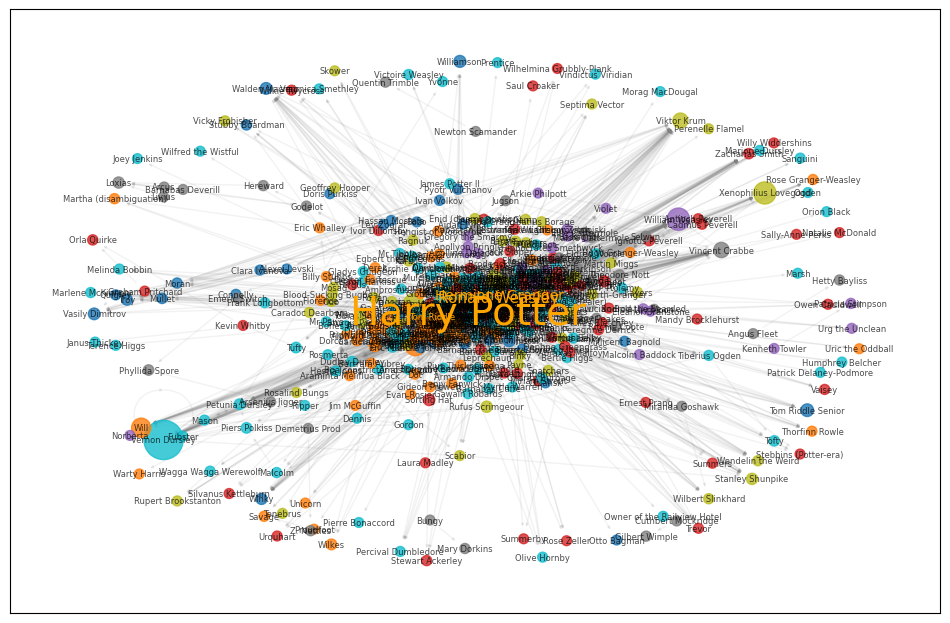

In [ ]:
plt.figure(figsize=(12, 8), dpi= 100)

g_pos = nx.spring_layout(G_all, k= 0.15, seed= 2025)

key_chars = ['Harry Potter', 'Ronald Weasley', 'Hermione Granger', 'Tom Riddle']
key_char_size = []

nx.draw_networkx_nodes(G_all, pos= g_pos, node_size= node_scale, node_color= node_colors, alpha= 0.8)
for ii, node in enumerate(G_all.nodes()):
    if node in key_chars:
        key_char_size.append(int(label_scale[ii]))
        continue
    nx.draw_networkx_labels(G_all, pos= g_pos, 
                            labels= {node: node}, 
                            font_size= int(label_scale[ii]), 
                            alpha= 0.7)
nx.draw_networkx_edges(G_all, pos= g_pos, arrowsize= 4, edge_color= "gray", alpha= 0.1)
for ii, node in enumerate(key_chars):
    nx.draw_networkx_labels(G_all, pos= g_pos, 
                            labels= {node: node}, 
                            font_size= key_char_size[ii], 
                            font_color= "orange", 
                            alpha= 1)
plt.savefig("images/all_edges_initials.png")
plt.show()


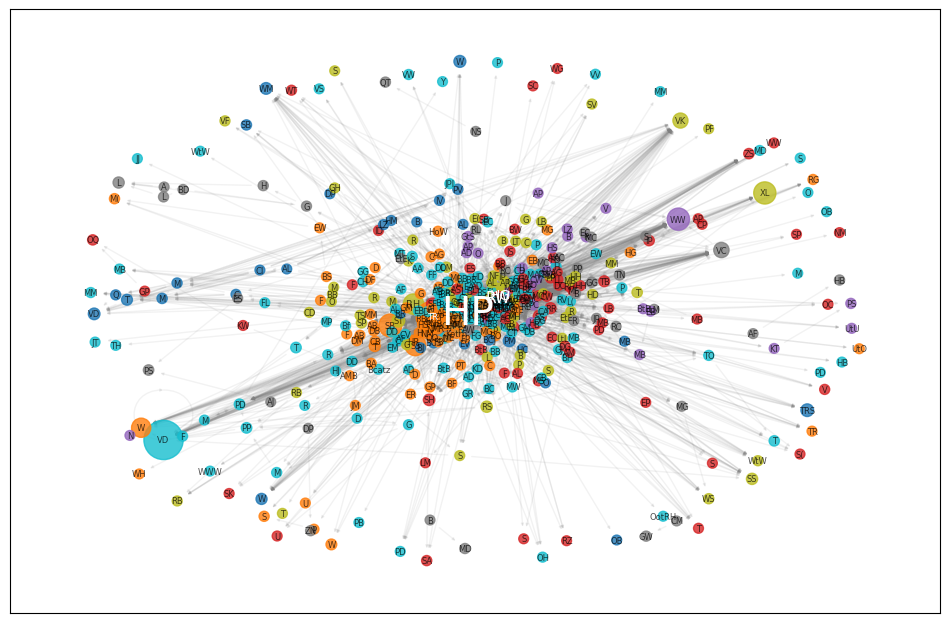

In [85]:
plt.figure(figsize=(12, 8), dpi= 100)

g_pos = nx.spring_layout(G_all, k= 0.15, seed= 2025)

key_chars = ['Harry Potter', 'Ronald Weasley', 'Hermione Granger', 'Tom Riddle']
key_char_size = []

nx.draw_networkx_nodes(G_all, pos= g_pos, node_size= node_scale, node_color= node_colors, alpha= 0.8)
for ii, node in enumerate(G_all.nodes()):
    if node in key_chars:
        key_char_size.append(int(label_scale[ii]))
        continue
    nx.draw_networkx_labels(G_all, pos= g_pos, 
                            labels= {node: "".join([w[0] for w in node.split()])}, 
                            font_size= int(label_scale[ii]), 
                            alpha= 0.7)
nx.draw_networkx_edges(G_all, pos= g_pos, arrowsize= 4, edge_color= "gray", alpha= 0.1)
for ii, node in enumerate(key_chars):
    nx.draw_networkx_labels(G_all, pos= g_pos, 
                            labels= {node: "".join([w[0] for w in node.split()])}, 
                            font_size= key_char_size[ii], 
                            font_color= "white", 
                            alpha= 1)
plt.savefig("images/all_edges_initials.png")
plt.show()


### 2) Analyze the composition and configuration of the detected communities. Discuss the narrative significance of these groupings, such as characters from the same Hogwarts house clustering together or alliances formed during key plot events. Examine how these community structures reflect the evolving social dynamics and relationships throughout the series.

In [86]:
for comm in lv_comms:
    print(comm)

{'Millicent Bagnold', 'Tom Riddle Senior', 'Ivan Volkov', 'Bertha Jorkins', 'Hassan Mostafa', 'Alexei Levski', 'Otto Bagman', 'Emmeline Vance', 'Herbert Chorley', 'Quigley', 'Williamson', 'Ludovic Bagman', 'Bartemius Crouch Senior', 'Pyotr Vulchanov', 'Stubby Boardman', 'Bartemius Crouch Junior', 'Mullet', 'Vasily Dimitrov', 'Bozo', 'Connolly', 'Lev Zograf', 'Aidan Lynch', 'Oblansk', 'Walden Macnair', 'Cornelius Fudge', 'Doris Purkiss', 'Prime Minister', 'Barry Ryan', 'Clara Ivanova', 'Winky', 'Moran', 'Troy'}
{'Avery (Marauder-era)', 'Dot', 'Andromeda Tonks', 'Fridwulfa', 'John Dawlish', 'Benjy Fenwick', 'Hugo Granger-Weasley', 'Circe', 'Mary Macdonald', 'Severus Snape', 'Morfin Gaunt', 'Ted', 'Derek', 'Cliodna', 'Frank Bryce', 'Warty Harris', 'Gornuk', 'Thorfinn Rowle', 'Florence', 'Galatea Merrythought', 'Quirinus Quirrell', 'Elladora Black', 'Hengist of Woodcroft', 'Alphard Black', 'Savage', 'Pius Thicknesse', 'Eric Whalley', 'Arcturus Black III', 'Unicorn', 'Marvolo Gaunt', 'Igor 